# LENDING CLUB CASE STUDY

Lending club is a US based company. They provide customized loan options based on customer's requirement. Customer needs to select the term, rate and payment options according to their convenience. 
Once the loan is funded, the money will be directly sent to the borrowers account or to the creditors directly.

The aim is to identify patterns which indicate if a person is likely to default (quits repaying the loan borrowed), which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

To achieve this goal, we will be using EDA (Exploratory Data Analysis) which would involve understanding the dataset, collecting and cleaing of data, analyzing the data with multiple graphs/plots and finally providing a few observations and recommendations to the club.

## EXPLORATORY DATA ANALYSIS ##

Flow of the analysis is as follows:

a. Data Sourcing  
b. Cleansing the dataset  
c. Data Analysis  
    > Univariate Analysis <space><space><space>  
    > Bivariate Analysis <space><space><space>  
d. Derived Metrics

## a. **Data Sourcing** 
Dataset has already been shared with multiple parameters to perform the analysis.
The given dataset is related to a lending club which is almost similar to a bank's repository.
This kind of data are called **private data** which are sensitive and confidential.

Let us now import/load the data:

## Collecting and importing data

In [1]:
#data collection and displaying the dataset 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

loan_data = pd.read_csv("loan.csv")

loan_data.head()

C:\Users\kmurthyn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### b. Cleaning data 

Cleaning of data is performed in order ensure that the data is in a format for smooth analysis. It needs to be cleaned to get rid of data quality issues. It is the most time consuming step in data analysis.

### Eliminating null values/columns ###

In [2]:
#removing columns which have null or 0 values

print("Number of null values in each column:\n", loan_data.isnull().sum())

Number of null values in each column:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


### Eliminate columns with more than 90% of missing/null values

In [3]:
#getting rid of the missing values

# sum of null values in a column divided by total number of rows * 100
total_rows = len(loan_data.index)
for column in loan_data:
    if ((loan_data[column].isnull().sum()/total_rows)*100) >= 90:
        loan_data = loan_data.drop(column, 1)
        
# round(loan_data.isnull().sum()/len(loan_data.index))*100
loan_data.info()

C:\Users\kmurthyn\AppData\Local\Temp/ipykernel_2104/2603577652.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  loan_data = loan_data.drop(column, 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Check for number of missing/null values in the row

In [4]:
#checking missing value counters

print("Number of null values in each row:\n", ((loan_data.isnull().sum(axis = 1))/len(loan_data.columns) * 100))

Number of null values in each row:
 0         3.636364
1         1.818182
2         5.454545
3         0.000000
4         0.000000
           ...    
39712     7.272727
39713     7.272727
39714    10.909091
39715    10.909091
39716     7.272727
Length: 39717, dtype: float64


> We can see that there are no outliers or rows with >=60% of null values.
    Hence, we can say that the data is clean and we can move to the next step to transform the data into a usable form.

In [5]:
#summary of the current data after clearing missing values

print(loan_data.head())
loan_data.info()

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1     

## Standardising values

### Column 'int_rate' is of type string (% character at the end) - let us transform the column to float data type to use it for analysis

In [6]:
#converting the data type of int_rate from object to float

loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

## c. Data Analysis #

The driving factors behind loan default which leads to risky applicants are:
* The applicant's credit history - analysing factor: grade, loan term, etc.
* The applicant's debt-to-income ratio - analysing factor: loan_amount, annual_inc, etc.
* The purpose of the loan, the amount involved, and prevailing interest rates - analyzing factor: purpose, int_rate, funded_amnt_inv
* An asset/collateral that can back or act as security for the loan - we do not have any data regarding this.

## Univariate Analysis ##

***Univariate is the simplest form of analyzing data using just 1 variable***  
Information about a dataset can be gained simply by looking at its metadata. Metadata is the data that describes each variable in detail.  
In our case metadata is the data dictonary that is provided by the tutor.

### Deciding factors as per analysis ### 
There are various parameters which would help us conclude/predict the reason behind applicants defaulting.

### Filter by removing rows with 'current' loan_status ###
Loan_status :-  
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted' and not required for analysis.

In [7]:
#removing the 'current' loan_status entries 
loan_data['loan_status'] = loan_data['loan_status'].astype('category')
loan_data = loan_data[loan_data['loan_status'] != 'Current']

#assign binary value 0 if fully paid else 1
loan_data['loan_status_num'] = loan_data['loan_status'].apply(lambda x: int(0) if x=='Fully Paid' else int(1))

loan_data['loan_status_num'].value_counts()

0    32950
1     5627
Name: loan_status_num, dtype: int64

In [8]:
#declaring a function to plot graphs using various parameters
import seaborn as sns

def plot_graph(cat_var):
    sns.barplot(x=cat_var, y='loan_status_num', data=loan_data)

### 1. Grade vs Loan Status ###

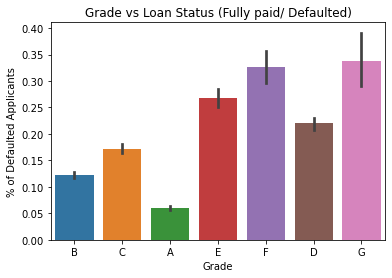

In [9]:
#plotting a bar plot with grade on x-axis and no. of applicants on y-axis

plot_graph('grade')
plt.xlabel('Grade')
plt.ylabel('% of Defaulted Applicants')
plt.title('Grade vs Loan Status (Fully paid/ Defaulted)')
plt.show()

**Observation**  
>  Here, we can conclude that as the grade increases the number of applicants defaulting increases.  
Note: Grade, higher the grade, higher the interest rate.

### 2. Loan Term vs Loan Status

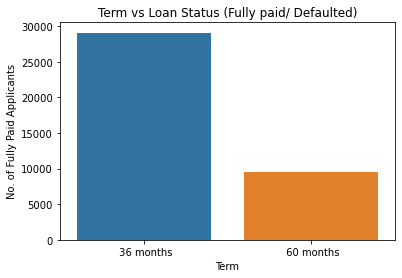

In [10]:
#plotting a count plot with term on x-axis and no. of fully paid applicants on y-axis

# default less in small term
# plot_graph('term')

sns.countplot(x=loan_data['term'], data=loan_data['loan_status'])
plt.xlabel('Term')
plt.ylabel('No. of Fully Paid Applicants')
plt.title('Term vs Loan Status (Fully paid/ Defaulted)')
plt.show()

**Observation**  
> In this count plot, the number of applicants who have fully paid the loan in small term are more when compared to a long term.

### 3. Purpose vs % of Defaulting Applicatants

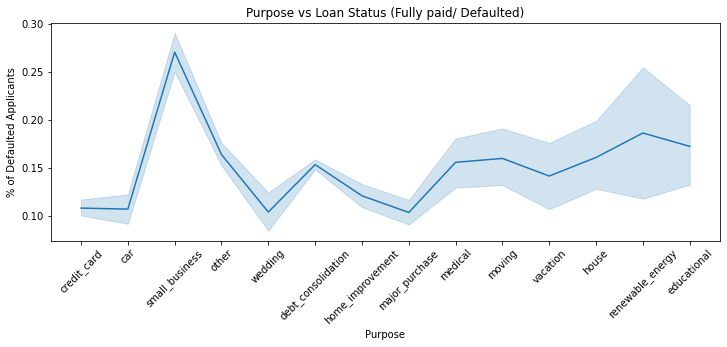

In [11]:
#plotting a line plot with purpose on x-axis and % of no. of applicants defaulting on y-axis

plt.figure(figsize=(12,4))
sns.lineplot(x='purpose', y='loan_status_num', data=loan_data)
plt.xlabel('Purpose')
plt.ylabel('% of Defaulted Applicants')
plt.title('Purpose vs Loan Status (Fully paid/ Defaulted)')

#rotating the x-axis labels for better display
plt.xticks(rotation=45)
plt.show()

**Observation**  
> Peak represents the number of default applicants.
We can see that most default loans fall into small_business, followed by renewable_energy, followed by education. This is one of the most important parameters in Univariate Analysis.

### 4. Interest Rate vs Defaulting Percentage ###

In [12]:
#gathering the variations (min, max, percentiles, etc) of the interest rate parameter

loan_data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

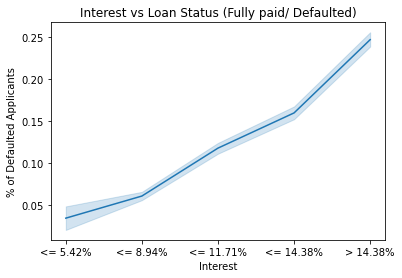

In [13]:
#defining a function using the 4 percentile values to plot a graph for analysis

def cat_int_rate(val):
    if val <= 5.42:
        return '<= 5.42%'
    elif val <= 8.94:
        return '<= 8.94%'
    elif val <= 11.71:
        return '<= 11.71%'
    elif val <= 14.38:
        return '<= 14.38%'
    else:
        return '> 14.38%'
    
    
loan_data['int_rate_%'] = loan_data['int_rate'].apply(lambda x : cat_int_rate(x))

# set categorical order
loan_data['int_rate_%'] = pd.Categorical(loan_data['int_rate_%'],
                                   categories=['<= 5.42%', '<= 8.94%', '<= 11.71%', '<= 14.38%', '> 14.38%'],
                                   ordered=True)

#plotting a line plot with interest on x-axis and % of no. of applicants defaulting on y-axis

sns.lineplot(x='int_rate_%', y='loan_status_num', data=loan_data)
plt.xlabel('Interest')
plt.ylabel('% of Defaulted Applicants')
plt.title('Interest vs Loan Status (Fully paid/ Defaulted)')
plt.show()

### 5. Verification status vs Grade

**Observation**  
> Similar to finding the loan status using the grade parameter, we can observe that lower the interest rate, the lesser is the defaulting percentage. They are linearly proportional.

#### ***Interesting Insight***
From the below graph, it is quite strange to observe that the number of users with verified applications tend to default more when compared to those not verified.

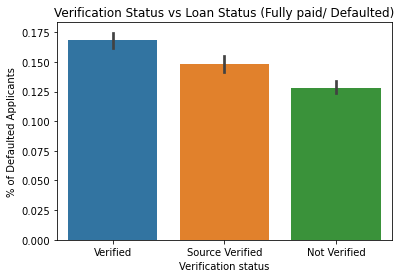

In [14]:
#plotting a bar plot with verification status on x-axis and % of no. of applicants defaulting on y-axis

plot_graph('verification_status')
plt.xlabel('Verification status')
plt.ylabel('% of Defaulted Applicants')
plt.title('Verification Status vs Loan Status (Fully paid/ Defaulted)')
plt.show()

**Observation**  
> Verified loans tend to default more than not verified loans.

### Non-deciding factors as per analysis ###

Below is a parameter which would not provide useful insights to determine the default rate

### 1. Home ownership vs Defaulting Percentage

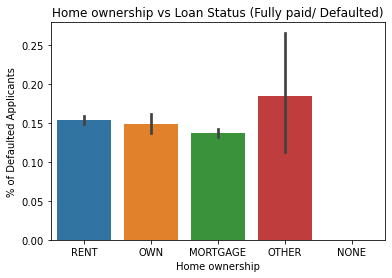

In [15]:
#plotting a bar plot with home ownership on x-axis and % of no. of applicants defaulting on y-axis

plot_graph('home_ownership')
plt.xlabel('Home ownership')
plt.ylabel('% of Defaulted Applicants')
plt.title('Home ownership vs Loan Status (Fully paid/ Defaulted)')
plt.show()

**Observation**  
> Here, we cannot really predict if an applicant would default or not using home ownership as a parameter as they seem to be equal throughout.

## Segmented Univariate Analysis ##

This type of analysis would extract useful insights by considering univariate analysis on segments of data  
  
 From the dataset, we have also understood that 'purpose' plays a vital role in understanding the default rate.  
As we run across the purpose graph, we see that few of the parameters play a major contributing role.  



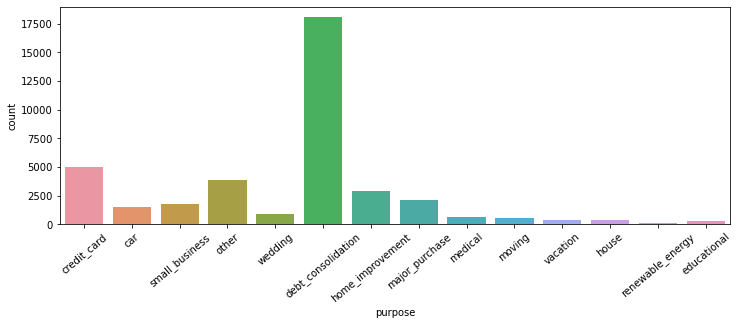

In [16]:
#plotting a count plot with purpose on x-axis and % of no. of applicants(count) on y-axis

plt.figure(figsize=(12,4))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=loan_data)
plt.show()

From the above plot, we see that debt_consolidation is the most important factor affecting default rate while renewable_energy is the least.

Now, lets segment the top 5 contibuting factors: debt_consolidation, credit_card, other, home_improvement and major_purchase

In [17]:
#segmenting the top 5 contributors

top_contributors = ["credit_card","debt_consolidation","home_improvement","major_purchase", "other"]
loan_data = loan_data[loan_data['purpose'].isin(top_contributors)]
loan_data['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

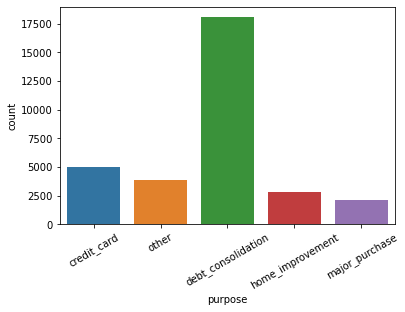

In [18]:
# plotting a count plot with purpose on x-axis and number of loans on y-axis

sns.countplot(x=loan_data['purpose'])

#rotating the x-axis labels for better display
plt.xticks(rotation=30)
plt.show()

Since the variable 'purpose' is the impacting variable with regards to the remaining variables, we can make comparisons using this specific 'purpose' variable against other categorical variables to better understand the deadulting rate.

### 1. Term vs purpose

To begin with, we can use purpose vs term as an instance

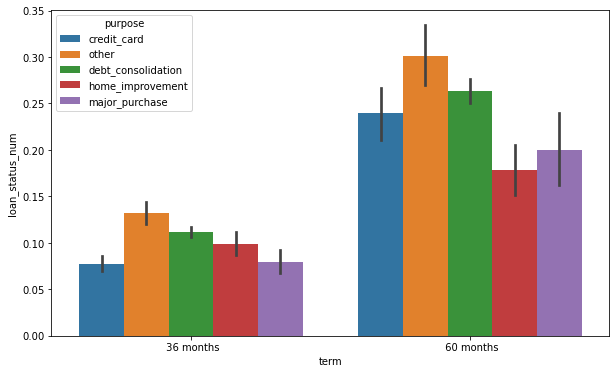

In [19]:
#plotting a bar plot with term on x-axis and % of no. of applicants(count) on y-axis

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status_num", hue='purpose', data=loan_data)
plt.show()

**Observation**
> We see that lower the term irrespective of the purpose would give us a lower default rate when compared to higher term.

### 2. Year vs purpose

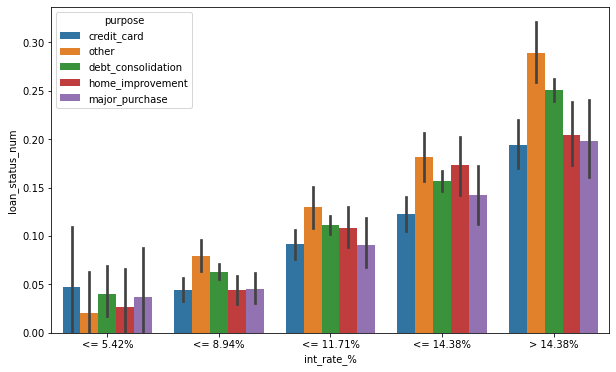

In [20]:
#plotting a bar plot with interest rate on x-axis and % of no. of applicants(count) on y-axis

plt.figure(figsize=[10, 6])
sns.barplot(x='int_rate_%', y="loan_status_num", hue='purpose', data=loan_data)
plt.show()

**Observation**  
> We can notice that, interest rates falling under 'others' purpose parameter tend to have a higher default rate when compared to other purposes (on an average).

We can similarly plot multiple plots by using this set of segmented parameters of the purpose column with various other variables like: year, installment, dti, emp_length, funded_amnt, funded_amnt_inv, annual_inc, etc to understand the default rate.

## Bi-variate Analysis ##

***Bivariate analysis is performed to learn the relationship between 2 varaibles***  
In bivariate analysis, we generally perform a co-relation to check if one variable rises/increases does the other variable also rise/increase or fall/decrease.

Let us now consider few variables together to understand their corresponding default rates.

### 1. Debt vs annual income ratio ###

In [21]:
#gathering the variations (min, max, percentiles, etc) of the dti parameter
#Note: dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

loan_data['dti'].describe()

count    31972.000000
mean        13.641543
std          6.568200
min          0.000000
25%          8.620000
50%         13.770000
75%         18.840000
max         29.990000
Name: dti, dtype: float64

Let us categorize this to low, medium, high and very high ratios

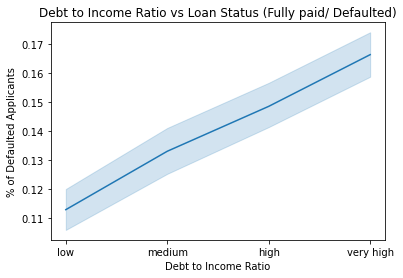

In [22]:
#categorizing the values based on the percentile values.

def cat_debt_income_ratio(val):
    if val <= 8.13:
        return 'low'
    elif val <= 13.37:
        return 'medium'
    elif val <= 18.56:
        return 'high'
    else:
        return 'very high'

loan_data['dti_cat'] = loan_data['dti'].apply(lambda x : cat_debt_income_ratio(x))

# set categorical order
loan_data['dti_cat'] = pd.Categorical(loan_data['dti_cat'],
                                   categories=['low', 'medium', 'high', 'very high'],
                                   ordered=True)

#plotting a line plot with the ratio on x-axis and % of deafulting applicants on y-axis

sns.lineplot(x='dti_cat', y='loan_status_num', data=loan_data)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('% of Defaulted Applicants')
plt.title('Debt to Income Ratio vs Loan Status (Fully paid/ Defaulted)')
plt.show()

**Observation**
> The debt to income ratio is linearly proportional to the percentage of defaulting applicants

### 2. Requested amount vs sanctioned/funded amount ratio ###

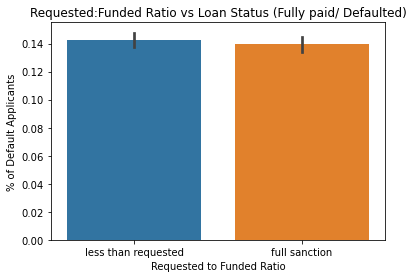

In [23]:
#finding the ratio between loan amount requested by borrow to the amount funded by the investors

loan_data['req_fun_ratio'] = loan_data['funded_amnt_inv'] / loan_data['loan_amnt']
# loan_data['req_fun_ratio'].head()
loan_data['req_fun_ratio'].describe()

def temp(val):
    if val == 1:
        return 'full sanction'
    else:
        return 'less than requested'

#derive a new variable/column called req_fun_ratio

loan_data['req_fun_ratio'] = loan_data['req_fun_ratio'].apply(lambda x : temp(x))

#plotting a bar plot with the ratio on x-axis and % of deafulting applicants on y-axis

plot_graph('req_fun_ratio')
plt.xlabel('Requested to Funded Ratio')
plt.ylabel('% of Default Applicants')
plt.title('Requested:Funded Ratio vs Loan Status (Fully paid/ Defaulted)')
plt.show()

Assumption: Any adjustments to the 'loan_amnt' made by credit dept is not considered for this analysis.

**Observation**
> From the above graph, using this ratio, it is not possible to predict the possible defaulters.

### 3. Annual income vs loan amount

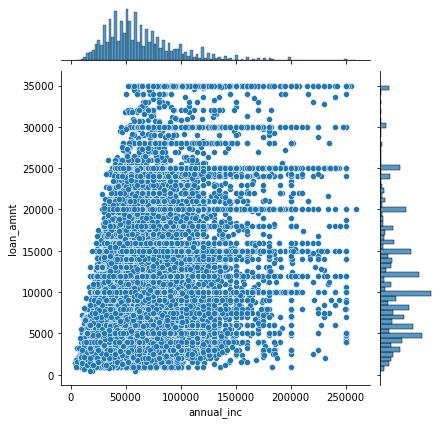

In [24]:
#plotting a joint plot with annual income on x-axis and loan amount on y-axis

sns.jointplot(x = 'annual_inc', y = 'loan_amnt', data = loan_data.loc[loan_data['annual_inc']<260000])
plt.show()

**Observation**
> We can see that applicants with annual income lower than 26,000 are applying for loans either equal to or higher than their salary. Which needs to be verified as this can cause credit loss to the company.

### 4. Loan status vs verfication status vs loan amount

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

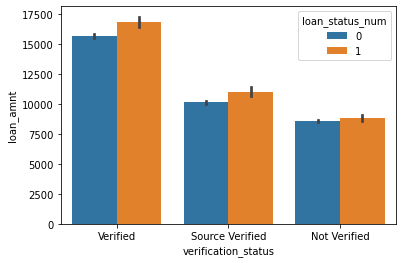

In [25]:
#plotting a bar plot with verification status on x-axis and loan amount on y-axis

sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status_num", data=loan_data)

**Observation**  
Note: 0 indicates fully paid, 1 indicates charged-off
> We can observe that in general, applications of all kinds requesting for a higher loan_amount are inclined to default than those who are fully re-paying their loans. 

### 5. Loan amount vs state vs loan amount

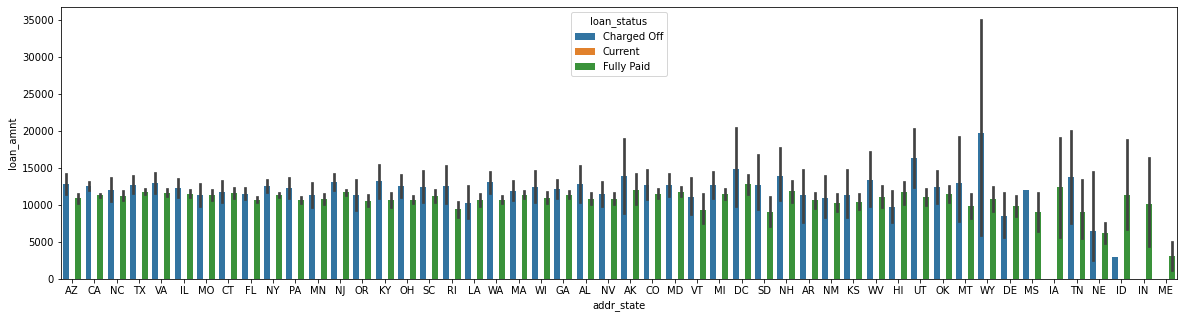

In [26]:
#plotting a bar plot with state on x-axis and loan amount on y-axis

plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_data)
plt.show()

**Observation**  
> We see that on an average, the state Wyoming is tending to default by DC. This observation needs to be checked by the club to understand the reason behind it.

### 6. Interest rate vs delinquent in 2 years vs loan status

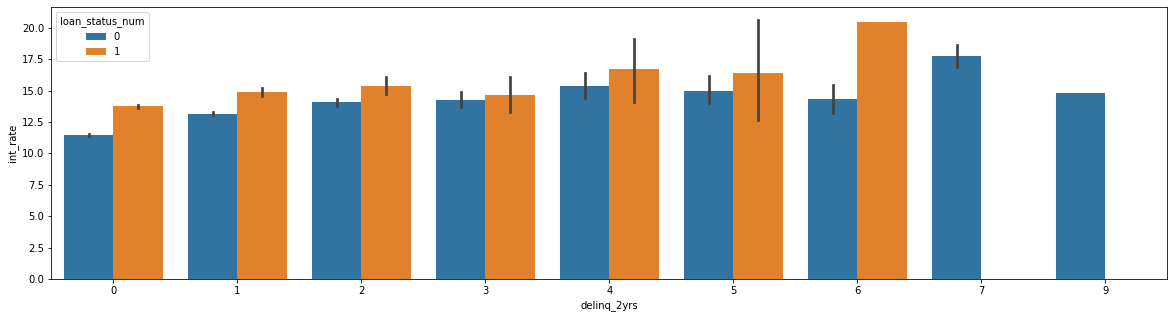

In [27]:
#plotting a bar plot with delinq_2yrs on x-axis and int_rate on y-axis

plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status_num',data=loan_data)
plt.show()

**Observation**  
> Note1: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
> Note2: 0 indicates fully paid, 1 indicates charged-off  
We can observe that, the interest rates offered for borrowers increases with the increase in delinquences. In turn they tend to default more.